# CSCI 111 Finals Project: Comparative Analysis of Gradient Boosting and Neural Networks in Classifying Stellar Bodies

*Submitted by Raul Jarod C. Conanan BSMS Computer Science in partial fulfillment of the finals project for CSCI 111 - Introduction to Artificial Intelligence 2023-2024*

**WARNING:** Please do not try running this on your local machine if it is not reasonably powerful. The following notebook takes around 45 minutes to run on a machine with an i7 10750H and 32GB of RAM. It is recommended that this be run on a Colab or Sagemaker Lab instance.

## Dataset

The data set used in this notebook was retrieved from https://www.kaggle.com/datasets/fedesoriano/stellar-classification-dataset-sdss17. The dataset comprises 100,000 space observations from the Sloan Digital Sky Survey (SDSS). Each observation is characterized by 17 feature columns and 1 class column, indicating whether it corresponds to a star, galaxy, or quasar.

1. obj_ID = Object Identifier, the unique value that identifies the object in the image catalog used by the CAS
2. alpha = Right Ascension angle (at J2000 epoch)
3. delta = Declination angle (at J2000 epoch)
4. u = Ultraviolet filter in the photometric system
5. g = Green filter in the photometric system
6. r = Red filter in the photometric system
7. i = Near Infrared filter in the photometric system
8. z = Infrared filter in the photometric system
9. run_ID = Run Number used to identify the specific scan
10. rereun_ID = Rerun Number to specify how the image was processed
11. cam_col = Camera column to identify the scanline within the run
12. field_ID = Field number to identify each field
13. spec_obj_ID = Unique ID used for optical spectroscopic objects (this means that 2 different observations with the same spec_obj_ID must share the output class)
14. class = object class (galaxy, star or quasar object)
15. redshift = redshift value based on the increase in wavelength
16. plate = plate ID, identifies each plate in SDSS
17. MJD = Modified Julian Date, used to indicate when a given piece of SDSS data was taken
18. fiber_ID = fiber ID that identifies the fiber that pointed the light at the focal plane in each observation

Our task, therefore, is to predict the class of the stellar body depending on the features provided

fedesoriano. (January 2022). Stellar Classification Dataset - SDSS17. Retrieved [4/8/2024] from https://www.kaggle.com/fedesoriano/stellar-classification-dataset-sdss17.

## Models Used

For this project, we will be comparing the performance of two different models to accomplish this classification task. Hyperparameter tuning will be done, but it will not be extremely intensive given both the limited computational resources and time available. The goal is to get performance metrics (i.e f1, recall, accuracy, precision) for both models which are "good enough" within the context of a course's final project, and comparing the ways these two models differ in both how they are trained, how they adapt to training data, and how they perform to test / evaluation data. With that said the following two models are to be compared:

### XGB (Extreme Gradient Boosting) Gradient Boosted Decision Tree

XGBoost is a high-performance library for gradient boosting that excels in classification tasks. It offers speed and efficiency, even with large datasets, through parallel processing and tree pruning. XGBoost provides built-in regularization to prevent overfitting, handles missing values well, and offers flexibility with objective functions and evaluation criteria. It is effective for unbalanced data, providing options to handle class imbalance. However, XGBoost can be complex to tune due to its many hyperparameters, computationally intensive with many or deep trees, and less interpretable compared to simpler models.

### Tensorflow Deep Neural Network

TensorFlow's Keras API simplifies the creation of deep neural networks (DNNs) for classification tasks, offering flexibility in building various architectures like CNNs and RNNs. DNNs excel in capturing complex patterns and can scale to large datasets with GPU acceleration. TensorFlow Keras provides tools to handle unbalanced data, such as class weights and oversampling/undersampling. However, training DNNs can be computationally intensive and require careful tuning. While DNNs offer high performance and can learn intricate features, they may be less interpretable than simpler models and require substantial amounts of data for training to avoid overfitting.

## Loading Data

If you are running this notebook on a colab instance uncomment the cell below and specify the path to the file (included in the zip under the dataset directory). Otherwise (i.e locally) use the subsequent cell to load your data by specifying the filepath.

In [ ]:
# from google.colab import drive
# import pandas as pd
# drive.mount('/content/drive')
# 
# file_location = '/content/drive/MyDrive/path/to/dataset/file/star_classification.csv'
# data = pd.read_csv(file_location)
# data

In [197]:
import pandas as pd

data = pd.read_csv("dataset/star_classification.csv")
data

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299
3,1.237663e+18,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,4192,301,3,214,1.030107e+19,GALAXY,0.932346,9149,58039,775
4,1.237680e+18,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,8102,301,3,137,6.891865e+18,GALAXY,0.116123,6121,56187,842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,1.237679e+18,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,7778,301,2,581,1.055431e+19,GALAXY,0.000000,9374,57749,438
99996,1.237679e+18,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,7917,301,1,289,8.586351e+18,GALAXY,0.404895,7626,56934,866
99997,1.237668e+18,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,5314,301,4,308,3.112008e+18,GALAXY,0.143366,2764,54535,74
99998,1.237661e+18,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,3650,301,4,131,7.601080e+18,GALAXY,0.455040,6751,56368,470


In [2]:
data.isnull().sum()

obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [4]:
data = data.drop(['obj_ID', 'run_ID', 'rerun_ID', 'cam_col', 'field_ID', 'plate', 'MJD', 'fiber_ID'], axis=1)
data

,alpha,delta,u,g,r,i,z,spec_obj_ID,class,redshift
0,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,6.543777e+18,GALAXY,0.634794
1,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,1.176014e+19,GALAXY,0.779136
2,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,5.152200e+18,GALAXY,0.644195
3,338.741038,-0.402828,22.13682,23.77656,21.61162,20.50454,19.25010,1.030107e+19,GALAXY,0.932346
4,345.282593,21.183866,19.43718,17.58028,16.49747,15.97711,15.54461,6.891865e+18,GALAXY,0.116123
...,...,...,...,...,...,...,...,...,...,...
99995,39.620709,-2.594074,22.16759,22.97586,21.90404,21.30548,20.73569,1.055431e+19,GALAXY,0.000000
99996,29.493819,19.798874,22.69118,22.38628,20.45003,19.75759,19.41526,8.586351e+18,GALAXY,0.404895
99997,224.587407,15.700707,21.16916,19.26997,18.20428,17.69034,17.35221,3.112008e+18,GALAXY,0.143366
99998,212.268621,46.660365,25.35039,21.63757,19.91386,19.07254,18.62482,7.601080e+18,GALAXY,0.455040


Here we drop most of the ID fields and retain spec_obj_ID given the earlier stated need for objects having the same spec_obj_ID to have the same classification. The rest we remove, given their relation to the classification task.

## Class Distribution

In [184]:
import seaborn as sns
import matplotlib.pyplot as plt

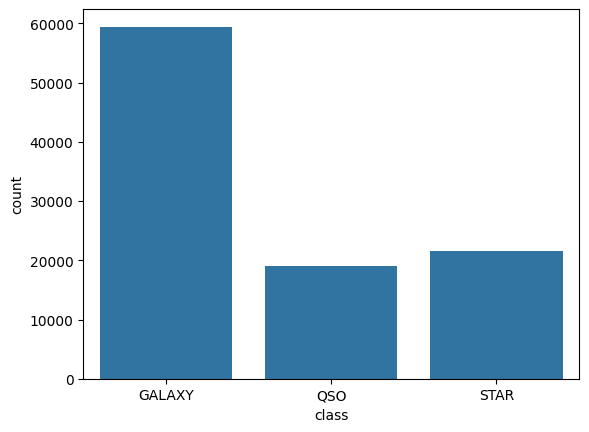

In [185]:
sns.countplot(x='class', data=data)
plt.show()

Here we see that the class distribution is quite unbalanced, with most of the instances present within our dataset being galaxies. Given this, we can reasonably expect that XGB perform better in this task given the limited dataset size of 100k rows.

# PREPROCESSING

In this section, we do some general preprocessing for passing to both the Gradient Boosted Trees and the Deep Neural Network. We separate the features from the target variables and hot encode the classes given the nature of the problem as a multiclass classification task. 

In [7]:
from sklearn.model_selection import train_test_split

In [6]:
X = data.drop(['class'], axis=1).to_numpy()
y = data['class']

In [8]:
y_encoded = pd.get_dummies(y, dtype=int)
y_encoded

,GALAXY,QSO,STAR
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
99995,1,0,0
99996,1,0,0
99997,1,0,0
99998,1,0,0


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# GRADIENT BOOSTING WITH XGBOOST

## XGBoost Classifier

Gradient boosting is generally less sensitive to class imbalance and can inherently handle the imbalance through the sequential construction of trees. For this reason, we can expect a reasonably good score from the different performance metrics (i.e f1 score, recall, etc.) in spite of the class imbalance present within the dataset.

In [10]:
from xgboost import dask as dxgb
from sklearn.model_selection import RandomizedSearchCV

In [11]:
model = dxgb.XGBClassifier(tree_method='hist', device='cuda')

### Hyperparameter Tuning

Here we use Randomized Search for tuning the hyperparameters of the XGBoost Classifier. Due to the exhaustive nature of Grid Search and the limited hardware resources and time available for thorough tuning, Randomized Search is chosen as a more efficient alternative. While Randomized Search does not guarantee finding the optimal hyperparameters, it can provide a good approximation within a reasonable time frame. The hyperparameters being tuned include learning rate, colsample_bytree, subsample, max_depth, n_estimators, reg_lambda, and gamma, each with a set of candidate values. 

1. **learning_rate:** The step size at each iteration of boosting. It is tested with values of 0.1 and 0.01.
2. **colsample_bytree:** The fraction of features to consider when building each tree. It is tested with values of 0.6, 0.8, and 1.0.
3. **subsample:** The fraction of samples to be used for fitting the individual base learners. It is tested with values of 0.6, 0.8, and 1.0.
4. **max_depth:** The maximum depth of the tree. It is tested with values of 3, 5, and 7.
5. **n_estimators:** The number of boosting rounds. It is tested with values of 100, 200, 300, and 400.
6. **reg_lambda:** L2 regularization term on weights. It is tested with values of 1, 1.5, and 2.
7. **gamma:** Minimum loss reduction required to make a further partition on a leaf node of the tree. It is tested with values of 0, 0.1, and 0.3.

**NOTE:** This section of the notebook and onwards is **computationally intensive and may cause some systems to struggle**. If you are running this locally, please check your machine's specifications before executing the subsequent cells. **The next cell is coded to utilize 100% of all of your cores.** 

In [12]:
param_grid = {
    "learning_rate": [0.1, 0.01],
    "colsample_bytree": [0.6, 0.8, 1.0],
    "subsample": [0.6, 0.8, 1.0],
    "max_depth": [3, 5, 7],
    "n_estimators": [100, 200, 300, 400],
    "reg_lambda": [1, 1.5, 2],
    "gamma": [0, 0.1, 0.3],
}

rand_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid, cv=3, n_jobs=-1, verbose=2)
rand_search.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device='cuda',
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_ra...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0, 0.1, 0.3],
                                        'learning_rate': [0.1, 0.01],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [100, 200, 300, 400],
                                        'reg_lambda': [1, 1.5, 2],
                                        'subsample': [0.6, 0.8, 1.0]},
                   verbose=2)

In [13]:
rand_search.best_params_

{'subsample': 0.8,
 'reg_lambda': 1,
 'n_estimators': 100,
 'max_depth': 7,
 'learning_rate': 0.1,
 'gamma': 0.3,
 'colsample_bytree': 0.8}

### Testing

In this section we test according to four different performance metrics from the sklearn.metrics library namely, accuracy_score, f1_score, recall_score, and precision_score; all of which are tested in order to asses the performance of the model. To get a better idea of how the models classify different instances, we also utilize a confusion matrix from the same library in order to visualize the predictions of the model compared to the actual test values.

In [14]:
y_pred = rand_search.predict(X_test)

D:\Docs\Ateneo\CSCI 111\finalsv5\venv\Lib\site-packages\xgboost\core.py:160: UserWarning: [17:07:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\common\error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


Accuracy: 97.42%
Precision: 97.66471540131847%
F1-Score: 0.9765208684289237
Recall: 0.97655


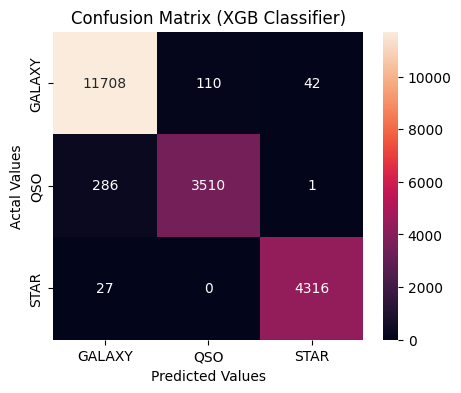

In [37]:
y_pred = rand_search.predict(X_test)
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f'Accuracy: {accuracy * 100}%')
print(f'Precision: {precision * 100}%')
print(f'F1-Score: {f1}')
print(f'Recall: {recall}')

classes = data['class'].unique().tolist()
cm_xgb = confusion_matrix(y_test.values.argmax(axis=1), y_pred.argmax(axis=1))
cm_df_xgb = pd.DataFrame(cm_xgb,
                     index = classes, 
                     columns = classes)
plt.figure(figsize=(5,4))
sns.heatmap(cm_df_xgb, annot=True, fmt='g')
plt.title('Confusion Matrix (XGB Classifier)')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

Here we can see that the model performs very well in terms of the four performance metrics. Looking closer at the confusion matrix, we see that the model struggles to classify quasars more than galaxies and stars. This is likely due to the limited training data available for the model and shows that its performance still suffers even if is capable of handling unbalanced data more. 

### Save XGB Model

So as to avoid having to retrain the model each time to demonstrate its performance, we save the entire model, including all of its weights onto a json file so that we can reload the model quickly into other programs / notebooks.

In [196]:
rand_search.best_estimator_.save_model("models/stellar_class_xgb.json")

# DEEP NEURAL NETWORKS WITH TENSORFLOW

In this section we now attempt to use Tensorflow Deep Neural Networks (DNN) for our classification task, to see if we can get a similarly high score on the different performance metric. Given the unbalanced distribution of classes within the data set it is reasonable to expect that it likely won't perform as well as the gradient booster out of the box. To avoid detracting too much from the task of training and utilizing different models and increasing the complexity of this project, oversampling methods such as SMOTE and ADASYN will not be utilized to balance out the class distribution of the dataset. However, it would be pertinent to note that since, such is the case, the model trained on this unbalanced data is likely not to generalize as well on unseen data.


**FROM FUTURE ME:** I tried it anyway and here is the confusion matrix from the results of a SMOTE oversampled dataset. We can see here that the minority classes are actually predicted more correctly compared to the model which is showed below. The issue however is in its poorer performance in classifying the majority class of galaxy, where there is a considerably higher amount of incorrect predictions made for galaxy instances, and thus lower scores across the different performance metrics. This model may generalize better to unseen data but would require a lot more tuning. This simply proves that, out of the box, XGB classifiers perform better with unbalanced datasets and don't require the same amount of training / pipelining for classification tasks like this.

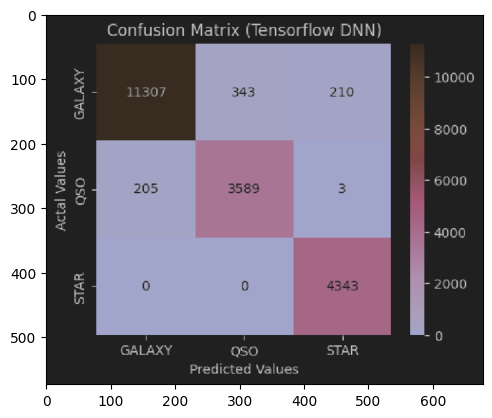

In [190]:
plt.imshow(plt.imread('oversampled_dnn_cm.png'))

## Import Dependencies

If you see your code editor / IDE complaining about keras not being there, it is. Keras is just lazily loaded. It should run just fine.

In [157]:
import tensorflow as tf
import numpy as np

In [158]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from keras_tuner.tuners import Hyperband, BayesianOptimization
from keras_tuner import HyperModel

### Scaling Values

Given that neural networks tend to perform better with scaled values, we first scale the values for each feature to fit a standard distribution.

In [160]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Hyperparameter Tuning Using Keras Tuner HyperModel

To give the neural network a decent chance against the gradient booster, we use Keras Tuner for testing the optimal structure for the DNN which would best fit the data and generalize well to unseen data. Here, we build a hypermodel that tests the following parameters:

1. **Units:** For each Dense layer, we test the number of units (i.e neurons) for each layer in the neural network. It is tested within the range of 32 to 512 with a step of 16.
2. **L1 and L2:** To prevent the model from overfitting, we implement l1 and l2 regularization and test different values from each. They are tested with choices of 0.1, 0.01, 0.001, 0.0001, and 0.00001.
3. **Number of Layers:** To find the optimal structure for the model, we test out different numbers of dense layers to construct the model with. Number of dense layers in the network. It is tested within the range of 1 to 5.
4. **Dropout:** Another regularization technique used to prevent overfitting, we implement dropout layers after each dense layer and test different dropout rates with choices of 0.1, 0.2, and 0.3.
5. **Learning Rate:** To find the optimal learning rate during the optimization process (i.e finding the optimal rate to find the best weights and biases) we test different learning rates for the Adam optimizer. It is tested with choices of 0.01, 0.001, and 0.0001.
6. **Batch Size:** To test the optimal batch size for training the model, we also test different batch sizes. It is tested with choices of 16, 32, and 64.

In [191]:
class DNNHyperModel(HyperModel):
    def build(self, hp):
        model = Sequential()
        model.add(Dense(units=hp.Int('units',
                                     min_value=32,
                                     max_value=512,
                                     step=16),
                        activation='relu',
                        kernel_regularizer=regularizers.l1_l2(
                            l1=hp.Choice('l1', values=[0.1, 0.01, 0.001, 0.0001, 0.00001]),
                            l2=hp.Choice('l2', values=[0.1, 0.01, 0.001, 0.0001, 0.00001])),
                        input_shape=(X_train.shape[1],)))
        for _ in range(hp.Int('num_layers', min_value=1, max_value=5)):
            model.add(Dense(units=hp.Int('units_' + str(_),
                                         min_value=16,
                                         max_value=256,
                                         step=16),
                            activation='relu',
                            kernel_regularizer=regularizers.l1_l2(
                                l1=hp.Choice('l1', values=[0.1, 0.01, 0.001, 0.0001, 0.00001]),
                                l2=hp.Choice('l2', values=[0.1, 0.01, 0.001, 0.0001, 0.00001]))))
            model.add(Dropout(rate=hp.Choice('dropout_rate',
                                             values=[0.1, 0.2, 0.3])))
        model.add(Dense(3, activation='softmax'))
        model.compile(optimizer=Adam(learning_rate=hp.Choice('learning_rate',
                                                             values=[1e-2, 1e-3, 1e-4])),
                      loss='categorical_crossentropy',
                      metrics=[tf.keras.metrics.CategoricalAccuracy()])
        return model

    def fit(self, hp, model, *args, **kwargs):
        return model.fit(
            *args,
            batch_size=hp.Choice('batch_size', [16, 32, 64]),
            **kwargs
        )

## HyperBand Tuner

Below we use a HyperBand tuner from Keras Tuner given that it offers a more balanced method of searching compared to the exhaustive Grid Search algorithm and the faster but less optimal Random Search algorithm. We set the objective of the tuner to maximize the categorical accuracy from the validation set and set the maximum number of epochs for each tested model to 20. We then save the different models tested to the hyperb_tuners directory. To speed up the process, we implement early stopping by monitoring the loss on the validation set and stop if it no longer improves / gets worse. 

In [162]:
tuner = Hyperband(
    DNNHyperModel(),
    objective='val_categorical_accuracy',
    max_epochs=20,
    factor=3,
    hyperband_iterations=2,
    directory='hyperb_tuners',
    overwrite=True
)

early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=5)

D:\Docs\Ateneo\CSCI 111\finalsv5\venv\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [163]:
tuner.search(X_train_scaled, y_train, epochs=20, validation_split=0.2, callbacks=[early_stopping])

Trial 60 Complete [00h 02m 45s]
val_categorical_accuracy: 0.9646250009536743

Best val_categorical_accuracy So Far: 0.9680625200271606
Total elapsed time: 00h 33m 19s


After all the trials are completed, we check for the best hyperparameters and use them to train the final DNN we are to build and use.

In [164]:
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]
print("Best Hyperparameters [HyperBand]: ", best_hyperparameters.values)

Best Hyperparameters [HyperBand]:  {'units': 480, 'l1': 1e-05, 'l2': 1e-05, 'num_layers': 3, 'units_0': 48, 'dropout_rate': 0.2, 'learning_rate': 0.001, 'units_1': 240, 'batch_size': 16, 'units_2': 176, 'units_3': 80, 'units_4': 240, 'tuner/epochs': 20, 'tuner/initial_epoch': 7, 'tuner/bracket': 2, 'tuner/round': 2, 'tuner/trial_id': '0042'}


In [165]:
dnn = tuner.hypermodel.build(best_hyperparameters)

D:\Docs\Ateneo\CSCI 111\finalsv5\venv\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Here we get identify the best number of epochs to train the model on by using the best parameters, building the model with an arbitrarily high epoch count for this particular task, and get the epoch with the highest validation categorical accuracy.

In [166]:
def get_best_epoch(dnn, X_train, y_train, epochs):
    history = dnn.fit(X_train, y_train, epochs=epochs, validation_split=0.2, callbacks=[early_stopping], batch_size=best_hyperparameters.values['batch_size'])
    val_acc_per_epoch = history.history['val_categorical_accuracy']
    best_epoch = val_acc_per_epoch.index(max(val_acc_per_epoch)) + 1
    print('Best epoch: %d' % (best_epoch,))
    return best_epoch

In [167]:
dnn_best_epoch = get_best_epoch(dnn, X_train_scaled, y_train, 50)

Epoch 1/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - categorical_accuracy: 0.8987 - loss: 0.3237 - val_categorical_accuracy: 0.9571 - val_loss: 0.1645
Epoch 2/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - categorical_accuracy: 0.9543 - loss: 0.1764 - val_categorical_accuracy: 0.9344 - val_loss: 0.2033
Epoch 3/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - categorical_accuracy: 0.9590 - loss: 0.1578 - val_categorical_accuracy: 0.9575 - val_loss: 0.1532
Epoch 4/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - categorical_accuracy: 0.9595 - loss: 0.1474 - val_categorical_accuracy: 0.9649 - val_loss: 0.1368
Epoch 5/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - categorical_accuracy: 0.9620 - loss: 0.1457 - val_categorical_accuracy: 0.9656 - val_loss: 0.1323
Epoch 6/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - categorical_accuracy: 0.9630 - loss: 0.1363 - val_categorical_accuracy: 0.9587 - val_loss: 0.1451
Epoch 7/50
4000/4000 ━━━━━━━━━━━━━━━━━━━━ 10s 2ms/step - categorical_a

Upon identifying the ideal number of epochs, we build train and evaluate the final DNN model.

In [168]:
def build_train_evaluate_dnn(optimized_hyperparams, best_epoch):
    dnn = tuner.hypermodel.build(optimized_hyperparams)
    dnn.fit(X_train_scaled, y_train, epochs=best_epoch, validation_split=0.2)
    eval_result = dnn.evaluate(X_test_scaled, y_test)
    print("[test loss, test accuracy]:", eval_result)
    return dnn

In [169]:
hype_dnn = build_train_evaluate_dnn(best_hyperparameters, dnn_best_epoch)

Epoch 1/17


D:\Docs\Ateneo\CSCI 111\finalsv5\venv\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2000/2000 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - categorical_accuracy: 0.8912 - loss: 0.3717 - val_categorical_accuracy: 0.9408 - val_loss: 0.2089
Epoch 2/17
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - categorical_accuracy: 0.9543 - loss: 0.1822 - val_categorical_accuracy: 0.9604 - val_loss: 0.1636
Epoch 3/17
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - categorical_accuracy: 0.9599 - loss: 0.1575 - val_categorical_accuracy: 0.9618 - val_loss: 0.1501
Epoch 4/17
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - categorical_accuracy: 0.9598 - loss: 0.1518 - val_categorical_accuracy: 0.9549 - val_loss: 0.1628
Epoch 5/17
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - categorical_accuracy: 0.9611 - loss: 0.1961 - val_categorical_accuracy: 0.9593 - val_loss: 0.1518
Epoch 6/17
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - categorical_accuracy: 0.9649 - loss: 0.1357 - val_categorical_accuracy: 0.9653 - val_loss: 0.1344
Epoch 7/17
2000/2000 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - categorical_accuracy: 0.9645 - 

Here we see that the model has a 0.13 loss and a 0.962 accuracy which is less than that of the gradient booster. Below we check for the other performance metrics and analyze the confusion matrix of this model's predictions.

In [170]:
def get_accuracies(dnn):
    y_pred = dnn.predict(X_test_scaled)
    y_pred_one_hot = np.eye(3)[np.argmax(y_pred, axis=1)]
    
    accuracy = accuracy_score(y_test, y_pred_one_hot)
    precision = precision_score(y_test, y_pred_one_hot, average='weighted')
    recall = recall_score(y_test, y_pred_one_hot, average='weighted')
    f1 = f1_score(y_test, y_pred_one_hot, average='weighted')
    
    print(f"Accuracy: {accuracy*100}%")
    print(f"Precision: {precision*100}%")
    print("Recall:", recall)
    print("F1 Score:", f1)
    
    classes = data['class'].unique().tolist()
    cm_dnn = confusion_matrix(y_test.values.argmax(axis=1), y_pred_one_hot.argmax(axis=1))
    cm_df_dnn = pd.DataFrame(cm_dnn,
                     index = classes, 
                     columns = classes)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm_df_dnn, annot=True, fmt='g')
    plt.title('Confusion Matrix (Tensorflow DNN)')
    plt.ylabel('Actal Values')
    plt.xlabel('Predicted Values')
    plt.show()


625/625 ━━━━━━━━━━━━━━━━━━━━ 1s 841us/step
Accuracy: 96.3%
Precision: 96.30590595832925%
Recall: 0.963
F1 Score: 0.962846758632656


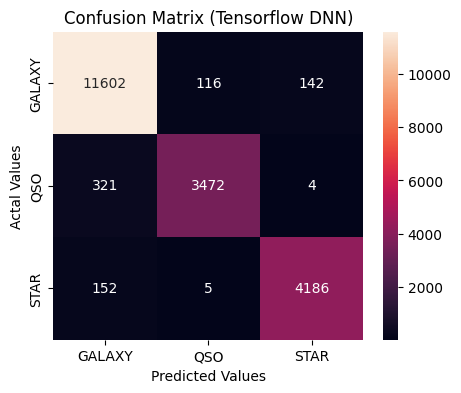

In [181]:
get_accuracies(hype_dnn)

Here we see that the model's precision, recall, and f1 score are also less than that of the gradient booster. Though the difference is not that significant, this shows the difference in performance between the two given the particular dataset and task. Looking closely at the confusion matrix, we see that the model struggles to predict instances of the minority classes (quasars and stars) due to the unbalanced dataset and the limited information present for the two of them. Because of the larger distribution of galaxies in the training data, the model if more likely to predict things as galaxies. Nevertheless, the model still performs very well and would still likely outperform other simpler algorithms like logistic regression significantly.

### Save DNN Model

Again so as to not have to retrain the model / run the notebook each time when we want to test it, we save the model as a .keras file so that we can easily load it into separate scripts / notebooks in the future. Below is a summary of the DNNs structure.

In [182]:
hype_dnn.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 480)            │         4,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 48)             │        23,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 48)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 240)            │        11,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 240)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 176)            │        42,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 176)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 3)              │           531 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 247,787 (967.92 KB)

 Trainable params: 82,595 (322.64 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 165,192 (645.29 KB)

In [195]:
hype_dnn.save('models/stellar_class_dnn.keras')

# Conclusions

After building, tuning, training, and evaluating both models, several key observations emerge from comparing the two. During training on my local machine, I closely monitored their resource usage. Tuning the hyperparameters for the gradient booster proved to be more computationally intensive compared to the process for the DNN. In terms of user-friendliness, the XGBoost Classifier excels due to its straightforward interpretability and out-of-the-box functionality, which surpasses that of the DNN. The XGBoost model required no standardization before training, nor did it need additional steps to generate actual outputs. In contrast, the DNN's outputs needed to pass through an argmax function before proper testing or evaluation. While the XGBoost model adapted quite well to the unbalanced data, the DNN struggled and would require additional tuning and oversampling techniques such as SMOTE or ADASYN to generalize better over unseen data, particularly when dealing with the minority class.